In [27]:
# Import packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
%run "../all_numerical_data.ipynb"

In [4]:
# Hyperparmeters:
max_iter=10000

### penalty='l2', max_iter=10000, multi_class='ovr', solver='liblinear'

In [4]:
# Training.
LM_model = LogisticRegression(penalty='l2', max_iter=max_iter, multi_class='ovr', solver='liblinear')
LM_model.fit(df_numerical[features],df_numerical['Body_Level'])

# Prediction
LM_pred = pd.DataFrame(LM_model.predict(df_numerical_val[features]))
print(LM_pred)

                0
0    Body Level 1
1    Body Level 1
2    Body Level 4
3    Body Level 4
4    Body Level 3
..            ...
291  Body Level 4
292  Body Level 3
293  Body Level 3
294  Body Level 4
295  Body Level 3

[296 rows x 1 columns]


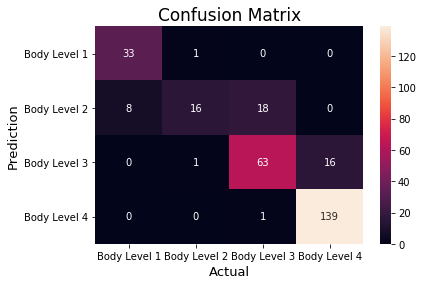

In [5]:
# Compute the confusion matrix.
cm = confusion_matrix(df_numerical_val['Body_Level'],LM_pred)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [6]:
# Finding the accuracy.
accuracy = accuracy_score(df_numerical_val['Body_Level'],LM_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(df_numerical_val['Body_Level'],LM_pred)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.847972972972973
Precision : [0.80487805 0.88888889 0.76829268 0.89677419] Macro Precision : 0.8397084535361483
Recall    : [0.97058824 0.38095238 0.7875     0.99285714] Macro Recall    : 0.7829744397759104
F1-score  : [0.88       0.53333333 0.77777778 0.94237288] Macro F1-score  : 0.7833709981167608
Support  : [ 34  42  80 140] Macro Support  : 74.0


### penalty='l2', max_iter=10000, multi_class='ovr', solver='lbfgs'

In [7]:
# Training.
LM_model = LogisticRegression(penalty='l2', max_iter=max_iter, multi_class='ovr', solver='lbfgs')
LM_model.fit(df_numerical[features],df_numerical['Body_Level'])

# Prediction
LM_pred = pd.DataFrame(LM_model.predict(df_numerical_val[features]))
print(LM_pred)

                0
0    Body Level 1
1    Body Level 1
2    Body Level 4
3    Body Level 2
4    Body Level 3
..            ...
291  Body Level 4
292  Body Level 3
293  Body Level 3
294  Body Level 4
295  Body Level 2

[296 rows x 1 columns]


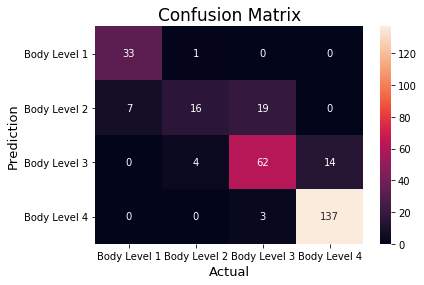

In [8]:
# Compute the confusion matrix.
cm = confusion_matrix(df_numerical_val['Body_Level'],LM_pred)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [9]:
# Finding the accuracy.
accuracy = accuracy_score(df_numerical_val['Body_Level'],LM_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(df_numerical_val['Body_Level'],LM_pred)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.8378378378378378
Precision : [0.825      0.76190476 0.73809524 0.90728477] Macro Precision : 0.8080711920529802
Recall    : [0.97058824 0.38095238 0.775      0.97857143] Macro Recall    : 0.7762780112044818
F1-score  : [0.89189189 0.50793651 0.75609756 0.94158076] Macro F1-score  : 0.7743766792044388
Support  : [ 34  42  80 140] Macro Support  : 74.0


### penalty='l2', max_iter=10000, multi_class='ovr', solver='newton-cg'

In [10]:
# Training.
LM_model = LogisticRegression(penalty='l2', max_iter=max_iter, multi_class='ovr', solver='newton-cg')
LM_model.fit(df_numerical[features],df_numerical['Body_Level'])

# Prediction
LM_pred = pd.DataFrame(LM_model.predict(df_numerical_val[features]))
print(LM_pred)

                0
0    Body Level 1
1    Body Level 1
2    Body Level 4
3    Body Level 2
4    Body Level 3
..            ...
291  Body Level 4
292  Body Level 3
293  Body Level 3
294  Body Level 4
295  Body Level 2

[296 rows x 1 columns]


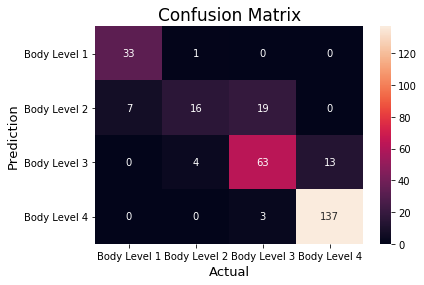

In [11]:
# Compute the confusion matrix.
cm = confusion_matrix(df_numerical_val['Body_Level'],LM_pred)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [12]:
# Finding the accuracy.
accuracy = accuracy_score(df_numerical_val['Body_Level'],LM_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(df_numerical_val['Body_Level'],LM_pred)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.8412162162162162
Precision : [0.825      0.76190476 0.74117647 0.91333333] Macro Precision : 0.8103536414565826
Recall    : [0.97058824 0.38095238 0.7875     0.97857143] Macro Recall    : 0.7794030112044819
F1-score  : [0.89189189 0.50793651 0.76363636 0.94482759] Macro F1-score  : 0.777073087417915
Support  : [ 34  42  80 140] Macro Support  : 74.0


### penalty='l2', max_iter=10000, multi_class='ovr', solver='sag'

In [13]:
# Training.
LM_model = LogisticRegression(penalty='l2', max_iter=max_iter, multi_class='ovr', solver='sag')
LM_model.fit(df_numerical[features],df_numerical['Body_Level'])

# Prediction
LM_pred = pd.DataFrame(LM_model.predict(df_numerical_val[features]))
print(LM_pred)

                0
0    Body Level 1
1    Body Level 1
2    Body Level 4
3    Body Level 4
4    Body Level 3
..            ...
291  Body Level 4
292  Body Level 3
293  Body Level 3
294  Body Level 4
295  Body Level 3

[296 rows x 1 columns]


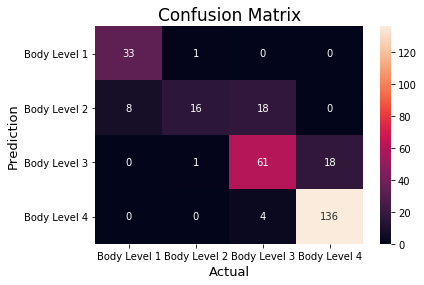

In [14]:
# Compute the confusion matrix.
cm = confusion_matrix(df_numerical_val['Body_Level'],LM_pred)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [15]:
# Finding the accuracy.
accuracy = accuracy_score(df_numerical_val['Body_Level'],LM_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(df_numerical_val['Body_Level'],LM_pred)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.831081081081081
Precision : [0.80487805 0.88888889 0.73493976 0.88311688] Macro Precision : 0.8279558949556011
Recall    : [0.97058824 0.38095238 0.7625     0.97142857] Macro Recall    : 0.7713672969187675
F1-score  : [0.88       0.53333333 0.74846626 0.92517007] Macro F1-score  : 0.771742414757314
Support  : [ 34  42  80 140] Macro Support  : 74.0


### penalty='l2', max_iter=10000, multi_class='ovr', solver='saga'

In [16]:
# Training.
LM_model = LogisticRegression(penalty='l2', max_iter=max_iter, multi_class='ovr', solver='saga')
LM_model.fit(df_numerical[features],df_numerical['Body_Level'])

# Prediction
LM_pred = pd.DataFrame(LM_model.predict(df_numerical_val[features]))
print(LM_pred)

                0
0    Body Level 1
1    Body Level 1
2    Body Level 4
3    Body Level 4
4    Body Level 3
..            ...
291  Body Level 4
292  Body Level 3
293  Body Level 3
294  Body Level 4
295  Body Level 3

[296 rows x 1 columns]


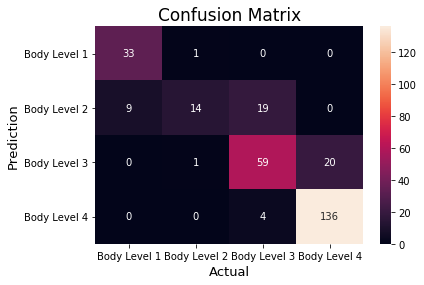

In [17]:
# Compute the confusion matrix.
cm = confusion_matrix(df_numerical_val['Body_Level'],LM_pred)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [18]:
# Finding the accuracy.
accuracy = accuracy_score(df_numerical_val['Body_Level'],LM_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(df_numerical_val['Body_Level'],LM_pred)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.8175675675675675
Precision : [0.78571429 0.875      0.7195122  0.87179487] Macro Precision : 0.8130053381577772
Recall    : [0.97058824 0.33333333 0.7375     0.97142857] Macro Recall    : 0.7532125350140056
F1-score  : [0.86842105 0.48275862 0.72839506 0.91891892] Macro F1-score  : 0.749623413492137
Support  : [ 34  42  80 140] Macro Support  : 74.0


### penalty='l1', max_iter=10000, multi_class='ovr', solver='liblinear'

In [19]:
# Training.
LM_model = LogisticRegression(penalty='l1', max_iter=max_iter, multi_class='ovr', solver='liblinear')
LM_model.fit(df_numerical[features],df_numerical['Body_Level'])

# Prediction
LM_pred = pd.DataFrame(LM_model.predict(df_numerical_val[features]))
print(LM_pred)

                0
0    Body Level 1
1    Body Level 1
2    Body Level 3
3    Body Level 2
4    Body Level 3
..            ...
291  Body Level 4
292  Body Level 3
293  Body Level 3
294  Body Level 4
295  Body Level 3

[296 rows x 1 columns]


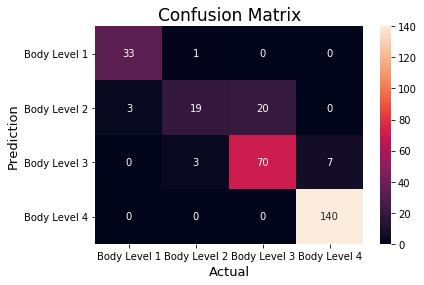

In [20]:
# Compute the confusion matrix.
cm = confusion_matrix(df_numerical_val['Body_Level'],LM_pred)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [21]:
# Finding the accuracy.
accuracy = accuracy_score(df_numerical_val['Body_Level'],LM_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(df_numerical_val['Body_Level'],LM_pred)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.8851351351351351
Precision : [0.91666667 0.82608696 0.77777778 0.95238095] Macro Precision : 0.8682280883367839
Recall    : [0.97058824 0.45238095 0.875      1.        ] Macro Recall    : 0.8244922969187676
F1-score  : [0.94285714 0.58461538 0.82352941 0.97560976] Macro F1-score  : 0.8316529238336986
Support  : [ 34  42  80 140] Macro Support  : 74.0


### penalty='l1', max_iter=10000, multi_class='ovr', solver='liblinear', C=100000.0

In [24]:
# Training.
LM_model = LogisticRegression(penalty='l1', max_iter=max_iter, multi_class='ovr', solver='liblinear', C=100000.0) #lambda = 1/C = 0.00001
LM_model.fit(df_numerical[features],df_numerical['Body_Level'])
# Prediction
LM_pred = pd.DataFrame(LM_model.predict(df_numerical_val[features]))
# print(LM_pred)

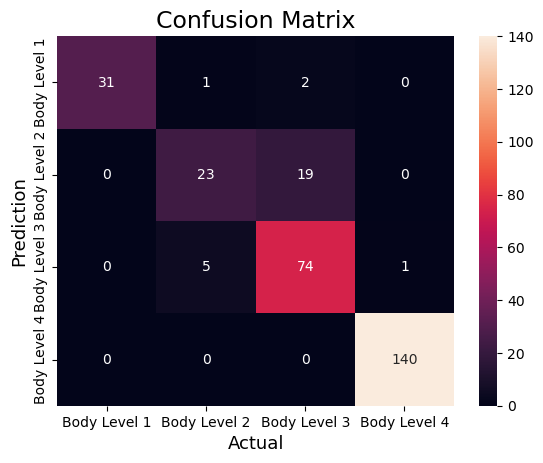

In [25]:
# Compute the confusion matrix.
cm = confusion_matrix(df_numerical_val['Body_Level'],LM_pred)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [26]:
# Finding the accuracy.
accuracy = accuracy_score(df_numerical_val['Body_Level'],LM_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(df_numerical_val['Body_Level'],LM_pred)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.9054054054054054
Precision : [1.         0.79310345 0.77894737 0.9929078 ] Macro Precision : 0.8912396545288386
Recall    : [0.91176471 0.54761905 0.925      1.        ] Macro Recall    : 0.8460959383753501
F1-score  : [0.95384615 0.64788732 0.84571429 0.99644128] Macro F1-score  : 0.8609722611607229
Support  : [ 34  42  80 140] Macro Support  : 74.0


### penalty='l2', max_iter=10000, multi_class='ovr', solver='liblinear', C=100000.0

In [28]:
# Training.
LM_model = LogisticRegression(penalty='l2', max_iter=max_iter, multi_class='ovr', solver='liblinear', C=100000.0) #lambda = 1/C = 0.00001
LM_model.fit(df_numerical[features],df_numerical['Body_Level'])
# Prediction
LM_pred = pd.DataFrame(LM_model.predict(df_numerical_val[features]))
# print(LM_pred)

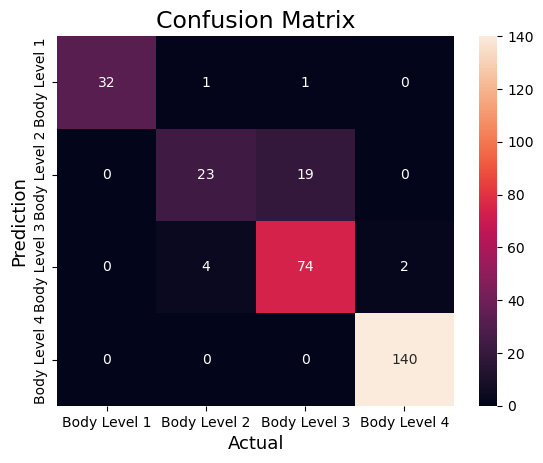

In [29]:
# Compute the confusion matrix.
cm = confusion_matrix(df_numerical_val['Body_Level'],LM_pred)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [30]:
# Finding the accuracy.
accuracy = accuracy_score(df_numerical_val['Body_Level'],LM_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(df_numerical_val['Body_Level'],LM_pred)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.9087837837837838
Precision : [1.         0.82142857 0.78723404 0.98591549] Macro Precision : 0.8986445267348774
Recall    : [0.94117647 0.54761905 0.925      1.        ] Macro Recall    : 0.8534488795518207
F1-score  : [0.96969697 0.65714286 0.85057471 0.9929078 ] Macro F1-score  : 0.8675805852254862
Support  : [ 34  42  80 140] Macro Support  : 74.0


In [31]:
print(classification_report(df_numerical_val['Body_Level'],LM_pred))

              precision    recall  f1-score   support

Body Level 1       1.00      0.94      0.97        34
Body Level 2       0.82      0.55      0.66        42
Body Level 3       0.79      0.93      0.85        80
Body Level 4       0.99      1.00      0.99       140

    accuracy                           0.91       296
   macro avg       0.90      0.85      0.87       296
weighted avg       0.91      0.91      0.90       296



In [ ]:
# Finding the accuracy.
accuracy = accuracy_score(df_numerical_val['Body_Level'],LM_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(df_numerical_val['Body_Level'],LM_pred)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.847972972972973
Precision : [0.80487805 0.88888889 0.76829268 0.89677419] Macro Precision : 0.8397084535361483
Recall    : [0.97058824 0.38095238 0.7875     0.99285714] Macro Recall    : 0.7829744397759104
F1-score  : [0.88       0.53333333 0.77777778 0.94237288] Macro F1-score  : 0.7833709981167608
Support  : [ 34  42  80 140] Macro Support  : 74.0


### penalty='l2', max_iter=10000, multi_class='ovr', solver='liblinear', C=0.0001

In [20]:
# Training.
LM_model = LogisticRegression(penalty='l2', max_iter=max_iter, multi_class='ovr', solver='liblinear', C=0.0001)
LM_model.fit(df_numerical[features],df_numerical['Body_Level'])
# Prediction
LM_pred = pd.DataFrame(LM_model.predict(df_numerical_val[features]))
# print(LM_pred)

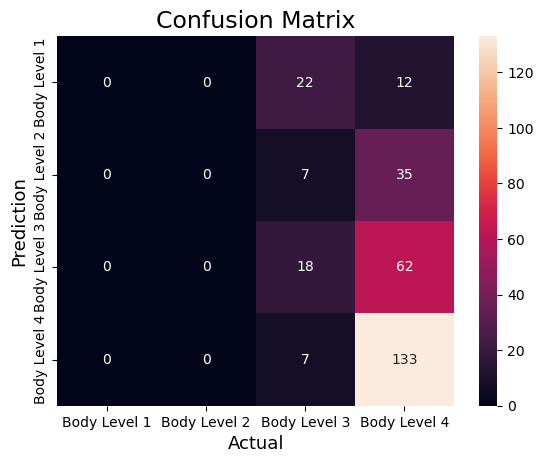

In [21]:
# Compute the confusion matrix.
cm = confusion_matrix(df_numerical_val['Body_Level'],LM_pred)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [22]:
# Finding the accuracy.
accuracy = accuracy_score(df_numerical_val['Body_Level'],LM_pred)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(df_numerical_val['Body_Level'],LM_pred)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))

Accuracy   : 0.5101351351351351
Precision : [0.         0.         0.33333333 0.54958678] Macro Precision : 0.22073002754820936
Recall    : [0.    0.    0.225 0.95 ] Macro Recall    : 0.29375
F1-score  : [0.         0.         0.26865672 0.69633508] Macro F1-score  : 0.2412479487379854
Support  : [ 34  42  80 140] Macro Support  : 74.0


/home/iten/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Number of iterations:

In [34]:
cs = []
train_err = []
val_err = []

for i in range(0,100000,10):
    # Training.
    cs_i = i
    if i == 0:
        cs_i = 1.0
    LM_model = LogisticRegression(penalty='l2', max_iter=max_iter, multi_class='ovr', solver='liblinear', C=cs_i)
    LM_model.fit(df_numerical[features],df_numerical['Body_Level'])

    # Prediction
    train_pred = pd.DataFrame(LM_model.predict(df_numerical[features]))
    val_pred = pd.DataFrame(LM_model.predict(df_numerical_val[features]))

    cs.append(cs_i)
    train_err.append(1.0-accuracy_score(df_numerical['Body_Level'],train_pred))
    val_err.append(1.0-accuracy_score(df_numerical_val['Body_Level'],val_pred))

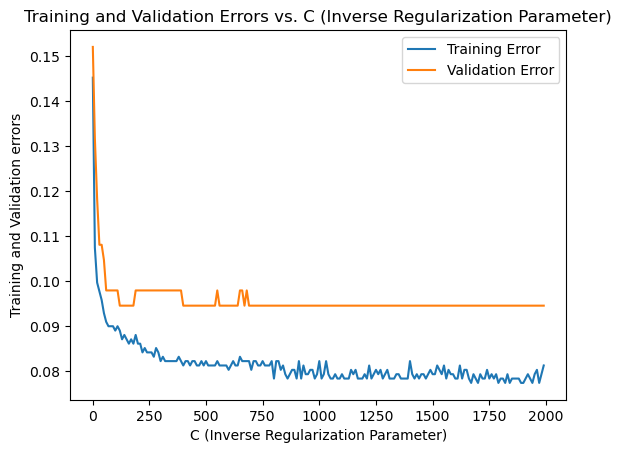

In [39]:
plt.plot(cs[:200],train_err[:200])
plt.plot(cs[:200],val_err[:200])
plt.title("Training and Validation Errors vs. C (Inverse Regularization Parameter)")
plt.xlabel("C (Inverse Regularization Parameter)")
plt.ylabel("Training and Validation errors")
plt.legend(["Training Error", "Validation Error"])
plt.show()